In [389]:
import warnings

warnings.filterwarnings('ignore')

# 1. Plotting Time Series Data using pandas

In [188]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
file = Path('../../datasets/Ch9/closing_price.csv')
closing_price = pd.read_csv(file, 
                            index_col='Date',
                            parse_dates=True)

plt.rcParams["figure.figsize"] = [9, 4]

<AxesSubplot:xlabel='Date'>

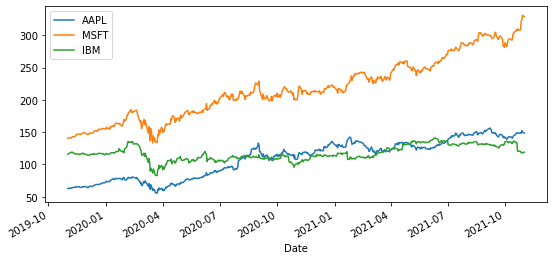

In [189]:
closing_price.plot()

<AxesSubplot:xlabel='Date'>

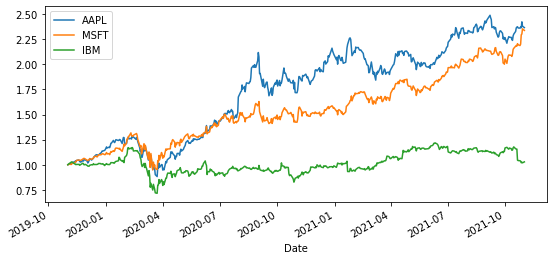

In [190]:
closing_price_n = closing_price.div(closing_price.iloc[0])
closing_price_n.plot()

In [7]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


<AxesSubplot:xlabel='Date'>

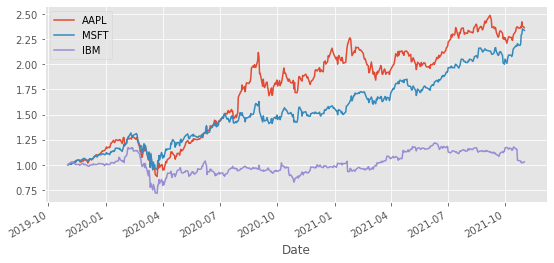

In [8]:
plt.style.use('ggplot')
closing_price_n.plot()

Using `.div()`

<AxesSubplot:xlabel='Date'>

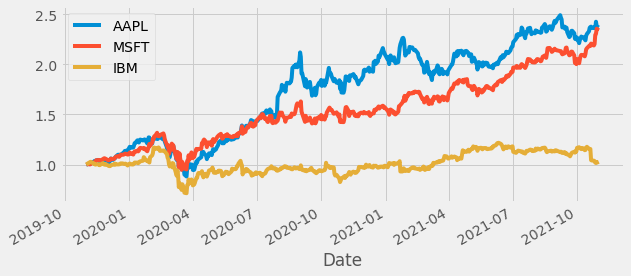

In [9]:
plt.style.use('fivethirtyeight')
closing_price_n.plot()

<AxesSubplot:xlabel='Date'>

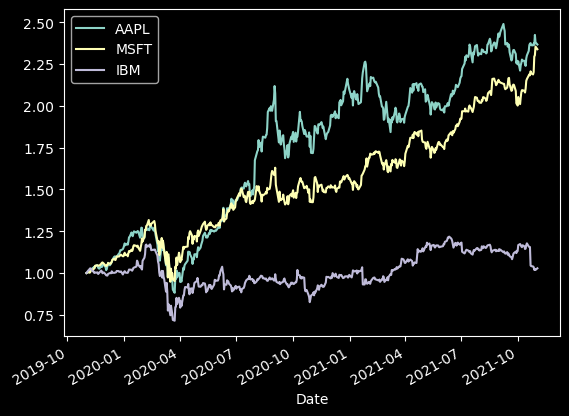

In [12]:
plt.style.use("dark_background")
closing_price_n.plot()

<AxesSubplot:xlabel='Date'>

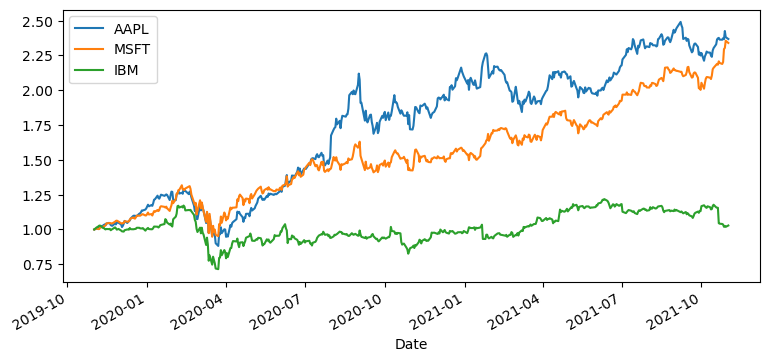

In [16]:
plt.style.use("default")
plt.rcParams["figure.figsize"] = [9, 4]
closing_price_n.plot()

In [17]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


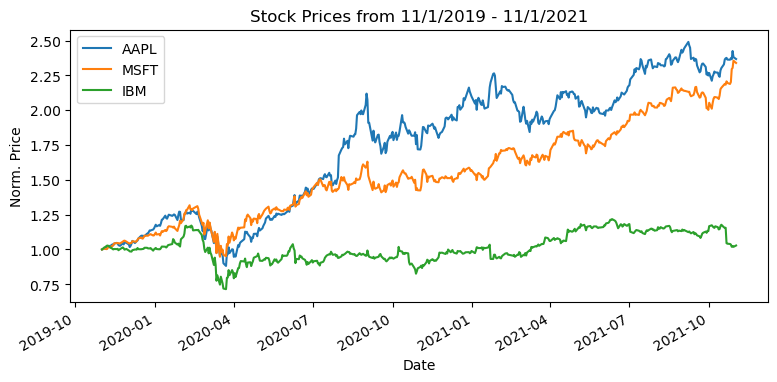

In [19]:
start_date = '11/1/2019'
end_date = '11/1/2021'
plot = closing_price_n.plot(
            title=f'Stock Prices from {start_date} - {end_date}',
            ylabel= 'Norm. Price')
plot.get_figure().savefig('plot_1.jpg')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

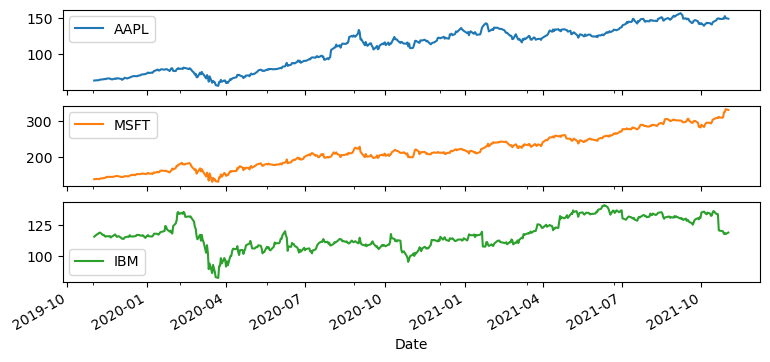

In [22]:
closing_price.plot(subplots=True)

# 2. Plotting Time Series with Interactive Visualization using hvplot and Plotly Express

In [24]:
import pandas as pd
import hvplot.pandas 
import hvplot as hv
import plotly.express as px 

closing_price_n = closing_price.div(closing_price.iloc[0])

In [25]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


In [26]:
closing_price_n.hvplot(
    title='Time Series plot using hvplot'
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [27]:
closing_price_n.plot(backend='hvplot', 
                     title='Time Series plot using hvplot')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [29]:
closing_price.hvplot(width=300, subplots=True)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [48]:
closing_price.hvplot(width=300, subplots=True).cols(2)

:NdLayout   [Symbols]
   :Curve   [Date]   (value)

### There is more

In [32]:
closing_price.hvplot.violin(by="Symbols", color='Symbols')

:Violin   [Variable]   (value)

In [31]:
closing_price['AAPL'].hvplot.violin(by=['index.year','index.month'])

:Violin   [index.year,index.month]   (AAPL)

In [33]:
closing_price['AAPL'].hvplot.line(by=['index.year'])

:NdOverlay   [index.year]
   :Curve   [Date]   (AAPL)

In [49]:
aapl_2020 = closing_price[closing_price.index.year == 2020]['AAPL']
aapl_2020.hvplot(groupby=['index.year', 'index.month'], widget_type='scrubber', widget_location='bottom')


Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=11, width=550)
        [2] HSpacer()

In [65]:
(closing_price_n['AAPL'].hvplot(width=400) + 
 closing_price_n['MSFT'].hvplot(width=400))

:Layout
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [64]:
(closing_price_n['AAPL'].hvplot(width=400) * 
 closing_price_n['MSFT'].hvplot(width=400))

:Overlay
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [35]:
(closing_price['AAPL'].hvplot(width=400) + closing_price['MSFT'].hvplot(width=400)) * closing_price['IBM'].hvplot()

:Layout
   .Overlay.I  :Overlay
      .Curve.AAPL :Curve   [Date]   (AAPL)
      .Curve.IBM  :Curve   [Date]   (IBM)
   .Overlay.II :Overlay
      .Curve.MSFT :Curve   [Date]   (MSFT)
      .Curve.IBM  :Curve   [Date]   (IBM)

In [39]:
import pandas as pd
import seaborn as sns

In [45]:
melted_cp = closing_price_n.copy().reset_index().melt(id_vars=['Date'], value_vars=closing_price_n.columns.tolist())
melted_cp.head()

,Date,Symbols,value
0,2019-11-01,AAPL,1.000000
1,2019-11-04,AAPL,1.006567
2,2019-11-05,AAPL,1.005121
3,2019-11-06,AAPL,1.005551
4,2019-11-07,AAPL,1.017156


In [44]:
closing_price.columns.names = ['Symbols']

<AxesSubplot:xlabel='Date'>

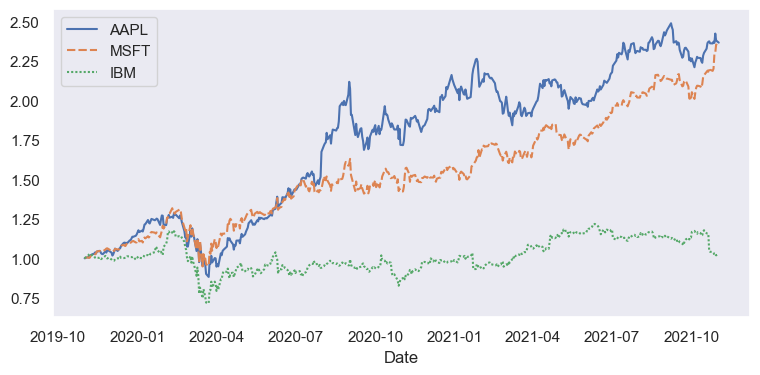

In [42]:
fig, ax = plt.subplots()
sns.lineplot(data=closing_price_n)

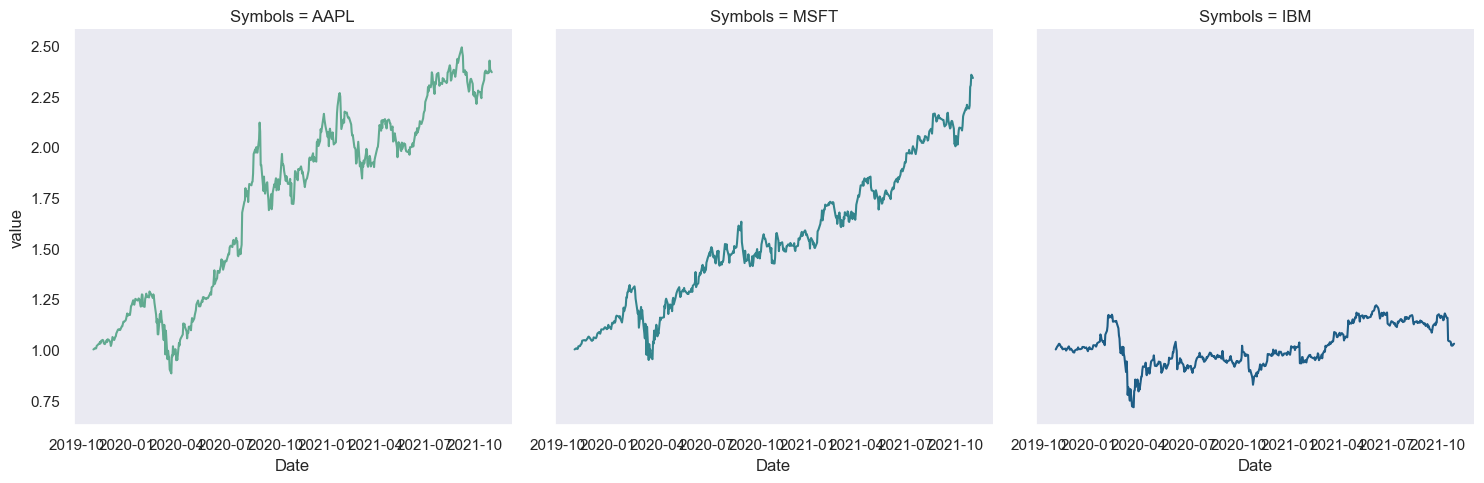

In [46]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=melted_cp,
    x="Date", y="value", col="Symbols", hue="Symbols",
    kind="line", palette="crest", legend=False, #col_wrap=1,
)

# 3. Decomposing Time Series

In [3]:
import pandas as pd
import statsmodels as sm
from statsmodels.datasets import elec_equip, co2
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (10,3)

In [4]:
# co2 data
co2_df = co2.load_pandas().data
co2_df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [5]:
# # elec_equip data
# elect_df = elec_equip.load_pandas().data
# elect_df.head()

In [6]:
# air passenger data
air_passengers = sm.datasets.get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='M')
airp_df.drop(columns=['time'], inplace=True)
airp_df.head()

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [7]:
# write as a CSV dataset for future use
airp_df.reset_index().rename(columns={'value':'passengers', 'index':'date'}).to_csv('../../datasets/Ch8/air_passenger.csv', index=False)

### Plot the datasets

In [38]:
# elect_df.plot()

In [15]:
co2_df.shape

(2284, 1)

<AxesSubplot:>

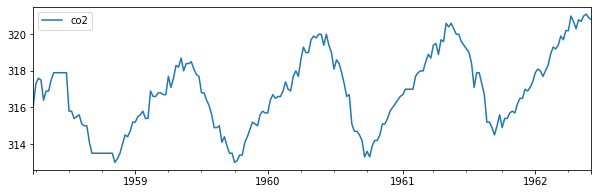

In [29]:
co2_df.head(220).plot()

<AxesSubplot:>

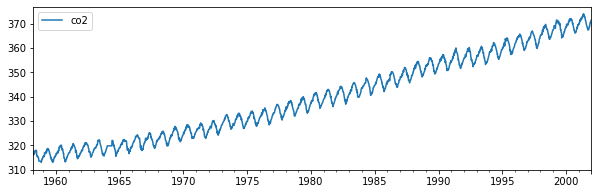

In [8]:
co2_df = co2_df.ffill()
co2_df.plot()

<AxesSubplot:>

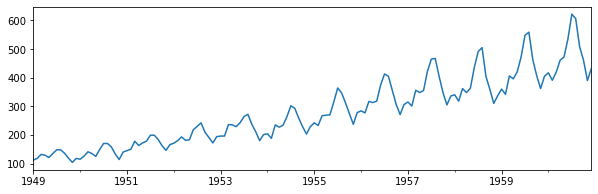

In [9]:
airp_df['value'].plot()

In [30]:
plt.rcParams["figure.figsize"] = (11,6)
co2_decomposed = seasonal_decompose(co2_df,model='additive')
air_decomposed = seasonal_decompose(airp_df,model='multiplicative')

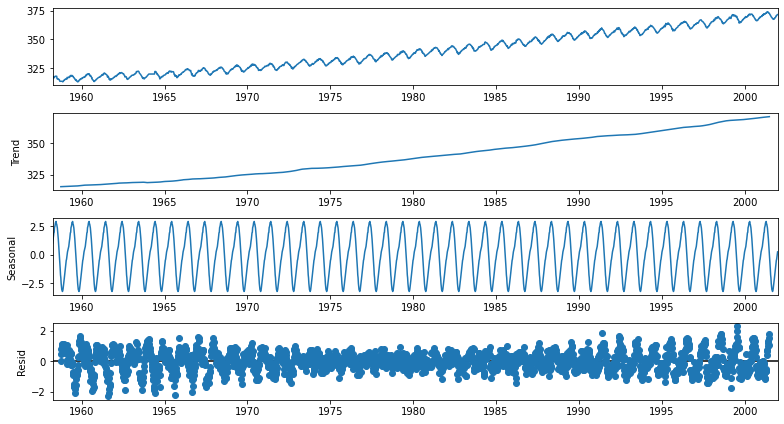

In [33]:
_ = co2_decomposed.plot()

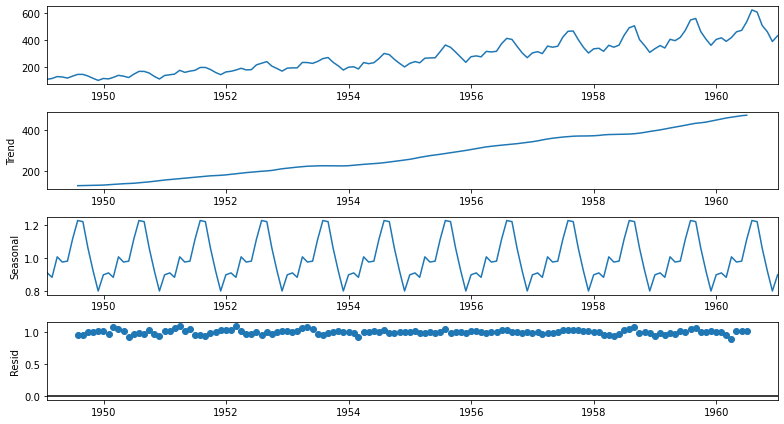

In [32]:
_ = air_decomposed.plot()

In [51]:
airp_df.reset_index()[airp_df.reset_index()['index'] == '1957-05-31']

,index,value
100,1957-05-31,355


In [53]:
print(air_decomposed.seasonal[100],
      air_decomposed.trend[100],
      air_decomposed.resid[100])

0.9813780274951296 364.5 0.9924176745109154


In [54]:
print(air_decomposed.seasonal[100] * 
      air_decomposed.trend[100] * 
      air_decomposed.resid[100])

355.0


In [56]:
co2_stl = STL(
    co2_df, 
    seasonal=13, 
    robust=True).fit()

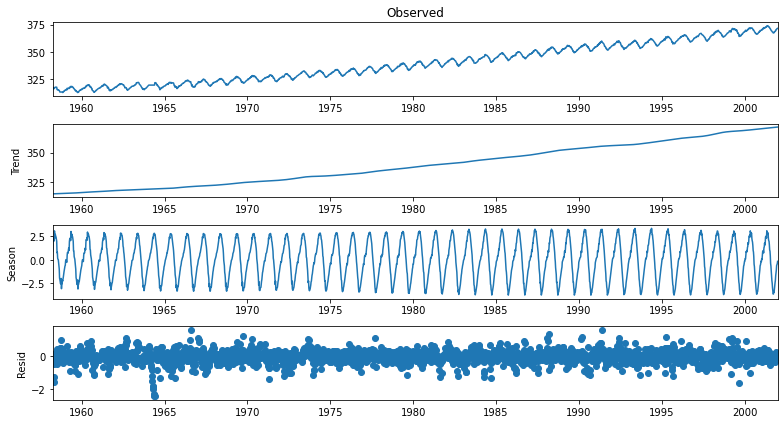

In [57]:
_ = co2_stl.plot()

### There is more

In [63]:
plt.rcParams["figure.figsize"] = (20,3)
from statsmodels.tsa.filters.hp_filter import hpfilter

In [66]:
hpfilter(co2_df)

(1958-03-29   -1.559479
 1958-04-05   -0.285928
 1958-04-12    0.088597
 1958-04-19    0.065250
 1958-04-26   -0.954871
                 ...   
 2001-12-01    0.619135
 2001-12-08    0.969594
 2001-12-15    1.215590
 2001-12-22    1.159358
 2001-12-29    1.202375
 Freq: W-SAT, Name: cycle, Length: 2284, dtype: float64,
 1958-03-29    317.659479
 1958-04-05    317.585928
 1958-04-12    317.511403
 1958-04-19    317.434750
 1958-04-26    317.354871
                  ...    
 2001-12-01    369.680865
 2001-12-08    369.830406
 2001-12-15    369.984410
 2001-12-22    370.140642
 2001-12-29    370.297625
 Freq: W-SAT, Name: trend, Length: 2284, dtype: float64)

In [64]:
co2_cyclic, co2_trend = hpfilter(co2_df)

<AxesSubplot:title={'center':'CO2 Trend Component'}>

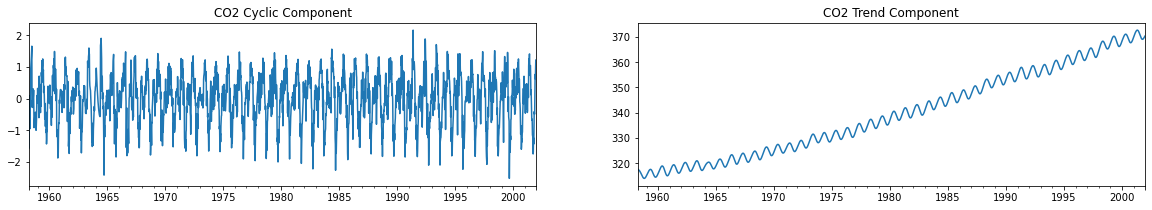

In [65]:
fig, ax = plt.subplots(1,2)
co2_cyclic.plot(ax=ax[0], title='CO2 Cyclic Component')
co2_trend.plot(ax=ax[1], title='CO2 Trend Component')

In [79]:
((co2_cyclic + co2_trend) == co2_df['co2']).sum()

2284

In [80]:
co2_df.shape

(2284, 1)

# 4. Detecting Time Series Stationarity 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.datasets import co2

plt.rcParams["figure.figsize"] = (15,4)

<AxesSubplot:>

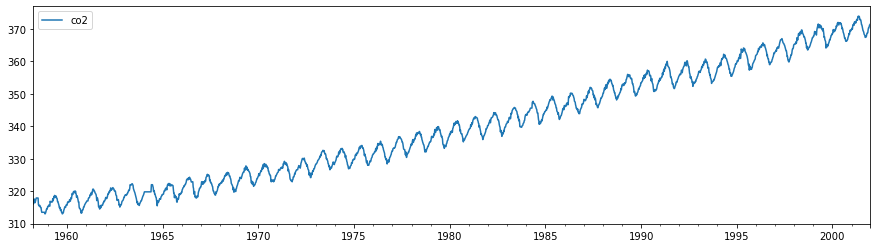

In [15]:
co2_df = co2.load_pandas().data.ffill()
co2_df.plot()

<AxesSubplot:ylabel='Frequency'>

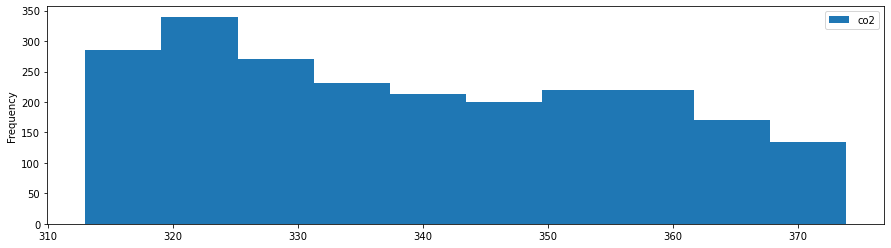

In [307]:
co2_df.plot(kind='hist')

In [3]:
co2_df.shape

(2284, 1)

In [355]:
n = co2_df.shape[0]
lags = int(12*(n/100)**(0.25))

In [374]:
kpss_output
adf_output

(-5.630182937691485,
 1.2674678311851365e-05,
 {'1%': -3.9627867132549217,
  '5%': -3.4124370148213488,
  '10%': -3.128196363946601},
 <statsmodels.tsa.stattools.ResultsStore at 0x7fd2a56c91f0>)

In [415]:
# use this instead 
def print_results(output, test='adf'):
    
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'
            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test)

In [475]:
adf_output = adfuller(co2_df)
kpss_output = kpss(co2_df)

In [476]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,0.046051,8.183188
p-value,0.962179,0.01
Numbers of lags,27,27
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.433252,0.739
Critical Value (5%),-2.862822,0.463
Critical Value (10%),-2.567452,0.347
Critical Value (2.5%),NaN,0.574


In [443]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non-stationary'
    return (kpssh, adfh)

In [492]:
def plot_comparison(methods, plot_type='line'):
    n = len(methods) // 2
    fig, ax = plt.subplots(n,2, sharex=True, figsize=(20,10))
    for i, method in enumerate(methods):
        method.dropna(inplace=True)
        name = [n for n in globals() if globals()[n] is method]
        v, r = i // 2, i % 2

        kpss_s, adf_s = check_stationarity(method)

        method.plot(kind=plot_type, 
                    ax=ax[v,r], 
                    legend=False, 
                    title=f'{name[0]} --> KPSS: {kpss_s}, ADF {adf_s}')
        method.rolling(52).mean().plot(ax=ax[v,r], legend=False)
        

In [507]:
# using first order differencing 
first_order_diff = co2_df.diff().dropna()

# using second order differencing
differencing_twice = co2_df.diff(52).diff().dropna()

# using seasonal_decompose to remove trend
decomp = seasonal_decompose(co2_df)
sd_detrend = (decomp.observed - decomp.trend)

# using hp_filter 
cyclic, trend = hpfilter(co2_df)

# log transform
log_transform = np.log(co2_df)

# rolling mean 
rolling = co2_df.rolling(window=52).mean()
subtract_rolling_mean = co2_df - rolling

# combine the methods into a list
methods = [first_order_diff, differencing_twice, 
           subtract_rolling_mean, log_transform,
           sd_detrend, cyclic]

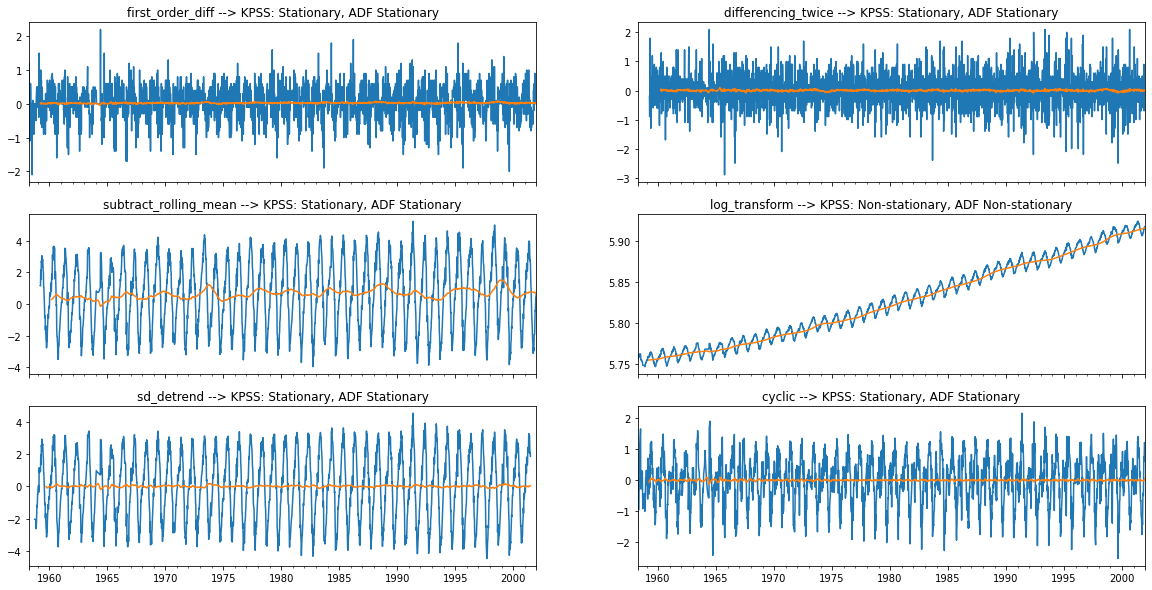

In [496]:
plot_comparison(methods)

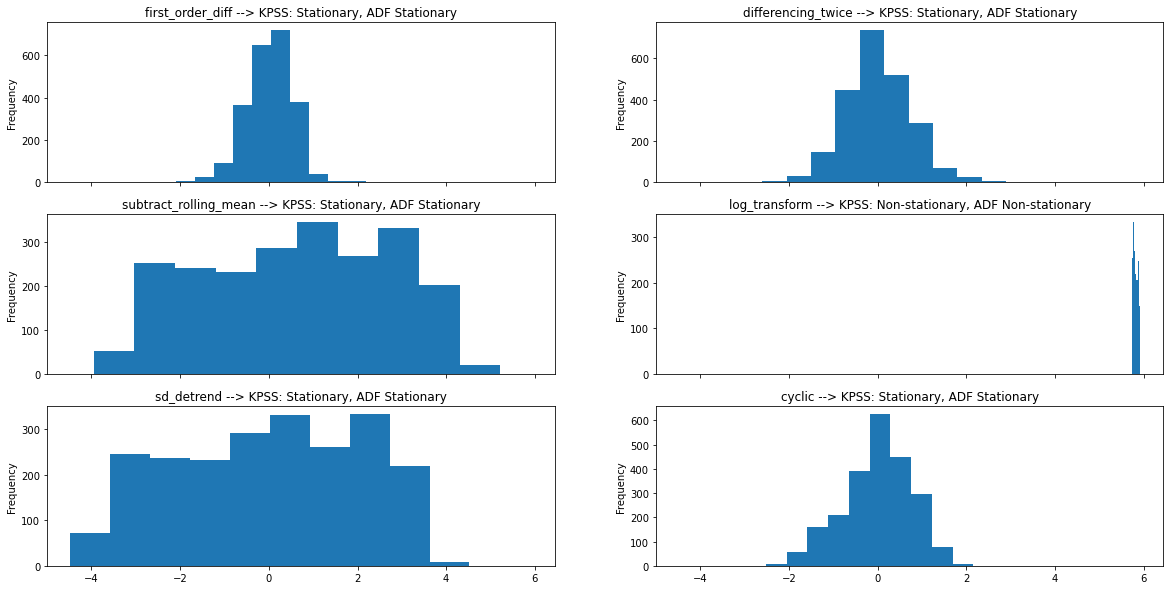

In [453]:
plot_comparison(methods, plot_type='hist')

### There is more

In [569]:
adf_result = adfuller(first_order_diff, store=True)

In [571]:
adf_result[3]

In [556]:
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:19:41   Log-Likelihood:                -1300.1
No. Observations:                2255   AIC:                             2658.
Df Residuals:                    2226   BIC:                             2824.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.2089      0.078    -15.517      0.000      -1.362      -1.056
x2             0.0694      0.074      0.934      0.351      -0.076       0.215
x3             0.0549      0.071      0.771      0.441      -0.085       0.194
x4             0.2661      0.068      3.894      0.000       0.132       0.400
x5             0.4363      0.066      6.603      0.000       0.307       0.566
x6             0.6273      0.064      9.780      0.000       0.502       0.753
x7             0.7159      0.063     11.377      0.000       0.592       0.839
x8             0.8211      0.062     13.246      0.000       0.699       0.943
x9             0.8455      0.061     13.779      0.000       0.725       0.966
x10            0.8269      0.061     13.641      0.000       0.708       0.946
x11            0.7763      0.060     13.011      0.000       0.659       0.893
x12            0.6904      0.058     11.815      0.000       0.576       0.805
x13            0.5949      0.057     10.486      0.000       0.484       0.706
x14            0.4798      0.055      8.736      0.000       0.372       0.588
x15            0.3971      0.053      7.466      0.000       0.293       0.501
x16            0.3136      0.052      6.074      0.000       0.212       0.415
x17            0.2572      0.050      5.096      0.000       0.158       0.356
x18            0.2521      0.050      5.082      0.000       0.155       0.349
x19            0.2443      0.049      4.982      0.000       0.148       0.341
x20            0.2534      0.049      5.211      0.000       0.158       0.349
x21            0.2867      0.048      5.940      0.000       0.192       0.381
x22            0.3286      0.048      6.864      0.000       0.235       0.422
x23            0.3501      0.047      7.426      0.000       0.258       0.443
x24            0.3452      0.046      7.504      0.000       0.255       0.435
x25            0.3440      0.044      7.904      0.000       0.259       0.429
x26            0.2724      0.039      6.924      0.000       0.195       0.350
x27            0.1844      0.032      5.846      0.000       0.123       0.246
x28            0.0940      0.021      4.493      0.000       0.053       0.135
const          0.0299      0.009      3.201      0.001       0.012       0.048
==============================================================================
Omnibus:                       57.058   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.961
Skew:                           0.023   Prob(JB):                     2.21e-29
Kurtosis:                       4.184   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [510]:
adf_result = adfuller(co2_df ,store=True)
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     24.42
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          1.63e-108
Time:                        08:17:25   Log-Likelihood:                -1310.4
No. Observations:                2256   AIC:                             2679.
Df Residuals:                    2227   BIC:                             2845.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.512e-05      0.001      0.046      0.963      -0.001       0.001
x2            -0.1320      0.021     -6.248      0.000      -0.173      -0.091
x3            -0.0062      0.021     -0.294      0.769      -0.048       0.035
x4             0.2200      0.021     10.403      0.000       0.178       0.261
x5             0.1717      0.022      7.932      0.000       0.129       0.214
x6             0.1930      0.022      8.799      0.000       0.150       0.236
x7             0.0872      0.022      3.911      0.000       0.044       0.131
x8             0.1022      0.022      4.569      0.000       0.058       0.146
x9             0.0212      0.022      0.944      0.345      -0.023       0.065
x10           -0.0200      0.022     -0.891      0.373      -0.064       0.024
x11           -0.0504      0.022     -2.244      0.025      -0.094      -0.006
x12           -0.0858      0.022     -3.816      0.000      -0.130      -0.042
x13           -0.0909      0.023     -4.034      0.000      -0.135      -0.047
x14           -0.1077      0.023     -4.774      0.000      -0.152      -0.063
x15           -0.0753      0.022     -3.350      0.001      -0.119      -0.031
x16           -0.0725      0.022     -3.238      0.001      -0.116      -0.029
x17           -0.0481      0.022     -2.149      0.032      -0.092      -0.004
x18            0.0024      0.022      0.109      0.913      -0.041       0.046
x19           -0.0042      0.022     -0.187      0.852      -0.048       0.040
x20            0.0103      0.022      0.461      0.645      -0.033       0.054
x21            0.0307      0.022      1.378      0.168      -0.013       0.074
x22            0.0327      0.022      1.474      0.140      -0.011       0.076
x23            0.0134      0.022      0.604      0.546      -0.030       0.057
x24           -0.0227      0.022     -1.042      0.298      -0.065       0.020
x25           -0.0169      0.021     -0.789      0.430      -0.059       0.025
x26           -0.0914      0.021     -4.354      0.000      -0.133      -0.050
x27           -0.0875      0.021     -4.154      0.000      -0.129      -0.046
x28           -0.0781      0.021     -3.726      0.000      -0.119      -0.037
const          0.0187      0.185      0.101      0.919      -0.345       0.382
==============================================================================
Omnibus:                       56.964   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.100
Skew:                           0.046   Prob(JB):                     5.61e-29
Kurtosis:                       4.173   Cond. No.                     6.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

## Detrending

In [695]:
df = co2_df.copy()

In [722]:
df['shift'] = co2_df.shift(52)
df.head()

,co2,shift
1958-03-29,316.1,NaN
1958-04-05,317.3,NaN
1958-04-12,317.6,NaN
1958-04-19,317.5,NaN
1958-04-26,316.4,NaN


In [728]:
model = ols('co2~shift', data=df).fit()

<AxesSubplot:>

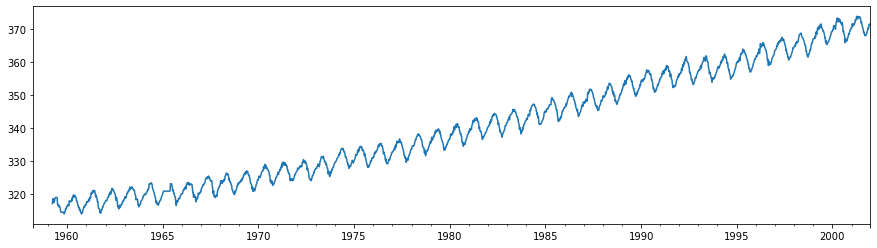

In [729]:
model.predict(df).plot()

<AxesSubplot:>

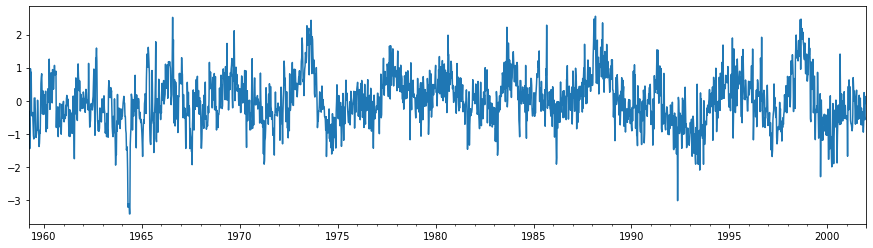

In [730]:
model.resid.plot()

<AxesSubplot:>

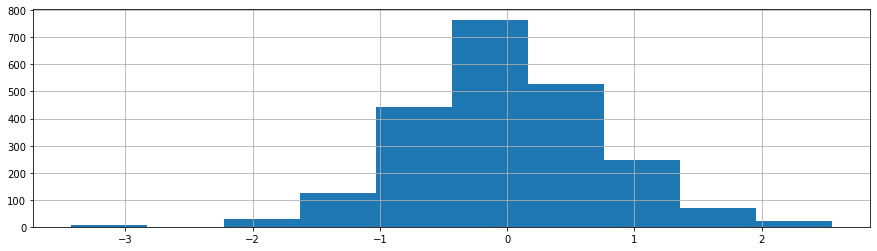

In [731]:
model.resid.hist()

In [732]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.089e+06
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:21:35   Log-Likelihood:                -2565.1
No. Observations:                2232   AIC:                             5134.
Df Residuals:                    2230   BIC:                             5146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0871      0.330    -12.375      0.000      -4.735      -3.439
shift          1.0159      0.001   1043.718      0.000       1.014       1.018
==============================================================================
Omnibus:                       40.592   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.532
Skew:                           0.016   Prob(JB):                     3.26e-18
Kurtosis:                       3.930   Cond. No.                     6.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. Applying Power Transformations to Time Series Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
# from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt, 
from statsmodels.stats.api import het_breuschpagan, het_goldfeldquandt, het_white, jarque_bera, omni_normtest, normal_ad
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from statsmodels.formula.api import ols
from pathlib import Path

### Testing for Normality

In [21]:
from scipy.stats import shapiro, kstest, normaltest, anderson
from statsmodels.stats.diagnostic import normal_ad, kstest_normal
import numpy as np

In [93]:
normal_args = (np.mean(co2_df),np.std(co2_df))

print(shapiro(x))
print(normaltest(x))
print(anderson(x))
print(normal_ad(x))
print(kstest_normal(x))
print(kstest(x, 'norm', (np.mean(x), np.std(x))))

ShapiroResult(statistic=0.9748928546905518, pvalue=0.009484317153692245)
NormaltestResult(statistic=19.73895197361124, pvalue=5.172982862620319e-05)
AndersonResult(statistic=0.971449827080761, critical_values=array([0.561, 0.639, 0.767, 0.894, 1.064]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
(0.971449827080761, 0.014065165762171494)
(0.0675024985274385, 0.1603739860772783)
KstestResult(statistic=0.06820319335416858, pvalue=0.49315254989690294)


In [104]:
is_normal(x, normaltest)

'Not Normal'

In [103]:
def is_normal(df, test, p_level=0.05):
    vals = df
    stat, pval = test(vals)
    
    return 'Normal' if pval > 0.05 else 'Not Normal'

In [107]:
x = boxcox(co2_df.values.ravel(), lmbda=a)

In [108]:
a

-2.5448478033026696

array([[<AxesSubplot:title={'center':'co2'}>]], dtype=object)

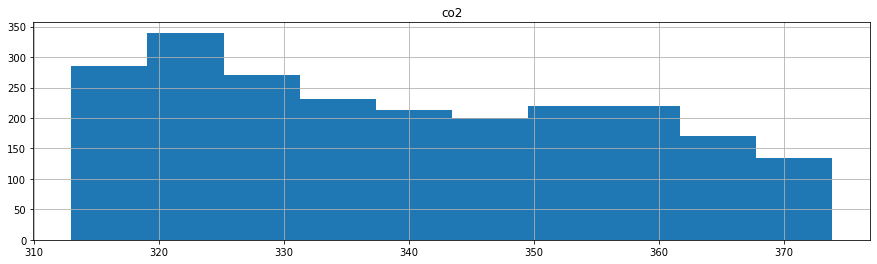

In [109]:
co2_df.hist()

(array([179., 314., 243., 232., 211., 210., 205., 261., 242., 187.]),
 array([0.39295063, 0.39295064, 0.39295065, 0.39295065, 0.39295066,
        0.39295066, 0.39295067, 0.39295068, 0.39295068, 0.39295069,
        0.3929507 ]),
 <BarContainer object of 10 artists>)

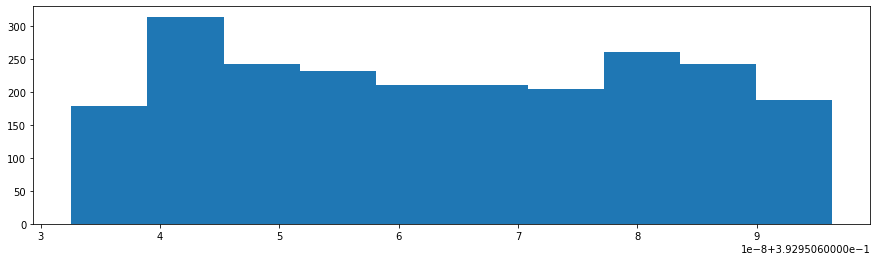

In [110]:
plt.hist(x)

In [63]:
def test_normal(df, test=kstest, p_level=0.05):    
    
    normal_args = (np.mean(df),np.std(df))
    
    # t_stat, p_value = test(df, 'norm', normal_args)
    t_stat, p_value = test(df)
    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level

<AxesSubplot:xlabel='Date'>

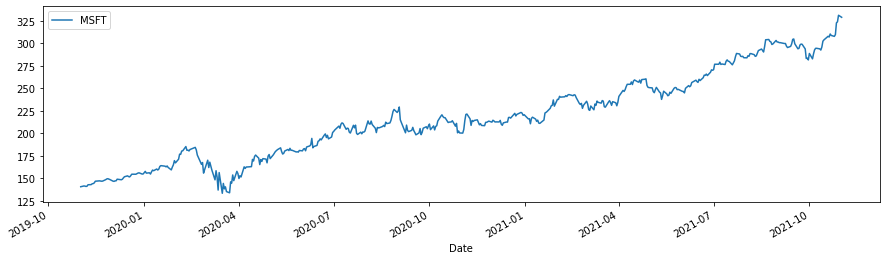

In [583]:
apple = pd.read_csv('../../datasets/Ch9/closing_price.csv', index_col='Date', parse_dates=True, usecols=['Date','MSFT'])
apple.plot()

<AxesSubplot:xlabel='Date'>

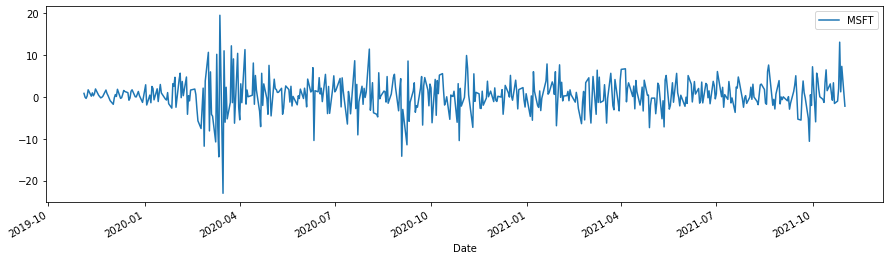

In [584]:
apple.diff().plot()

In [13]:
file = Path('../../datasets/Ch8/air_passenger.csv')
airp = pd.read_csv(file, 
                   index_col='date', 
                   parse_dates=['date'])
airp.head()

,passengers
date,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [622]:
x, a = boxcox(airp.values.ravel())
x = pd.Series(x, index=airp.index)

<AxesSubplot:xlabel='date'>

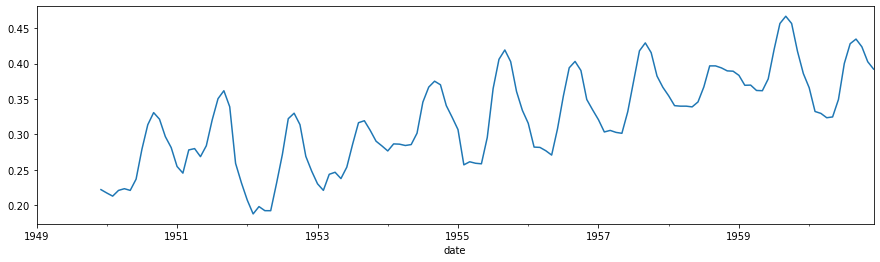

In [628]:
x.rolling(12).std().plot()

<AxesSubplot:xlabel='date'>

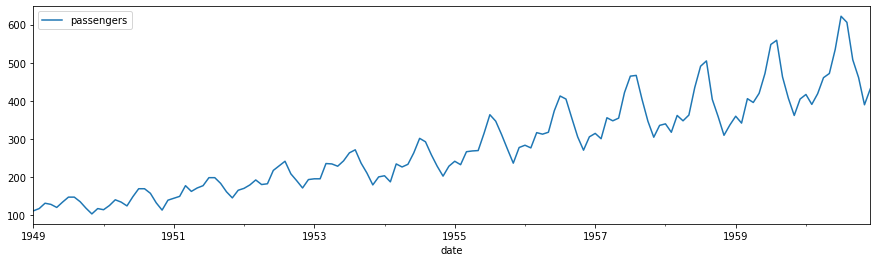

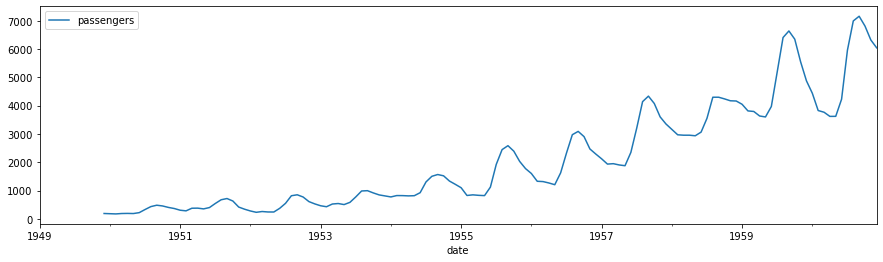

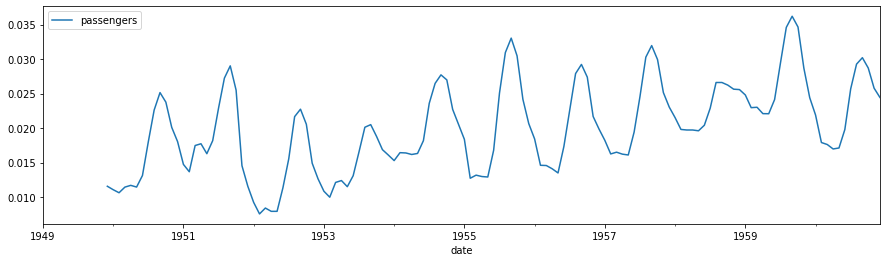

In [644]:
airp.plot()
airp.rolling(12).var().plot()
np.log1p(airp).rolling(12).var().plot()

<AxesSubplot:>

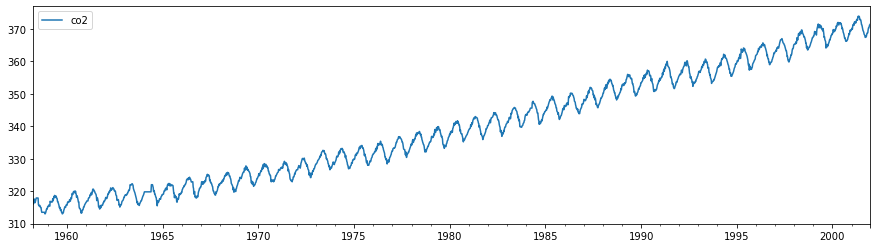

In [589]:
co2_df.plot()

<AxesSubplot:>

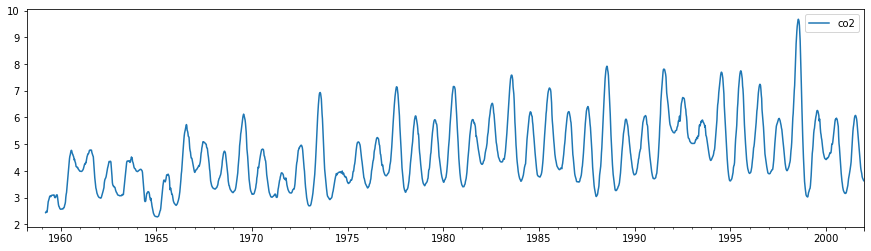

In [645]:
co2_df.rolling(52).var().plot()

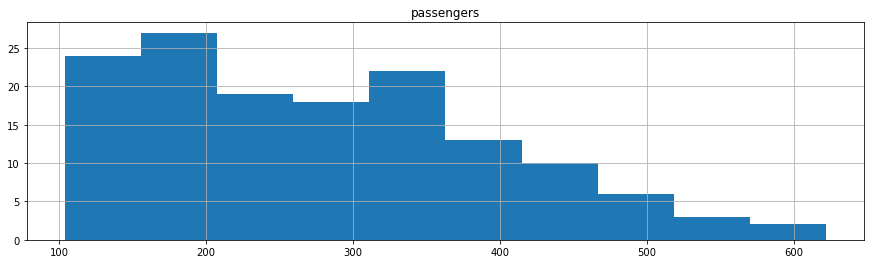

In [659]:
airp.hist()
plt.show()

array([[<AxesSubplot:title={'center':'passengers'}>]], dtype=object)

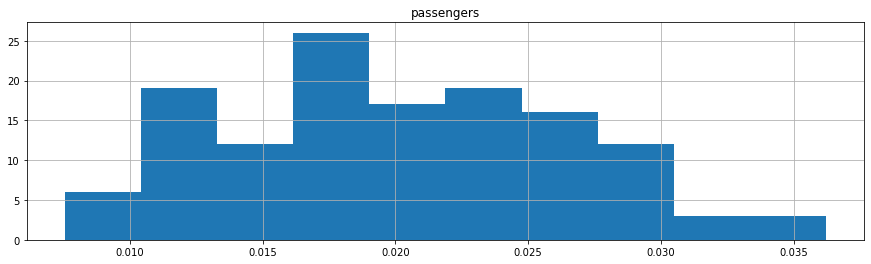

In [658]:
np.log1p(airp).rolling(12).var().hist()

In [631]:
test_stat, p_val = shapiro(airp)
print(p_val)

6.832739018136635e-05


In [665]:
df = airp.copy()
df['shift']= df.shift()

In [675]:
from statsmodels.graphics.api import qqplot

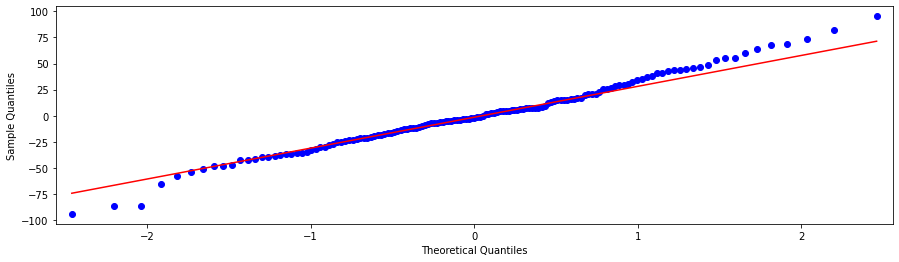

In [682]:
qqplot(model.resid, line='q');

In [668]:
#df = airp.reset_index()
model = ols(formula='passengers~shift', data=df).fit()

In [674]:
het_breuschpagan(model.resid, model.model.exog)

(49.66452595681126,
 1.8241450256300406e-12,
 75.02718801931684,
 9.722454893763707e-15)

<AxesSubplot:xlabel='date'>

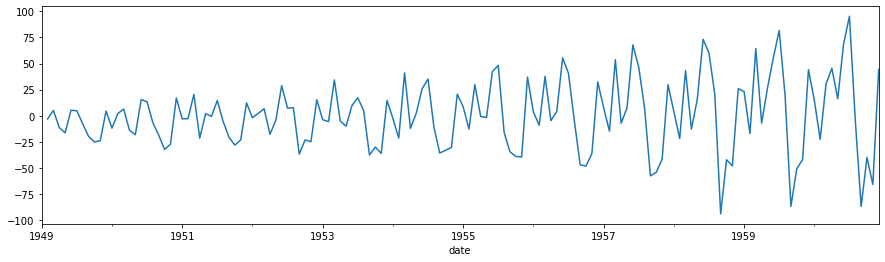

In [672]:
pd.Series(model.resid, index=airp.index).plot()

In [670]:
het_white(model.resid, model.model.exog)

(54.15454017302181,
 1.7397667098132678e-12,
 42.66754676596804,
 3.3958159001910463e-15)

In [635]:
xt, lmda = boxcox(airp.values.ravel())

In [636]:
test_stat, p_val = shapiro(xt)
print(p_val)

0.009484317153692245


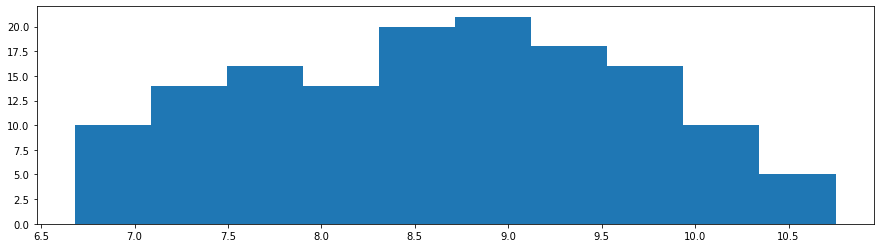

In [637]:
plt.hist(xt)
plt.show()

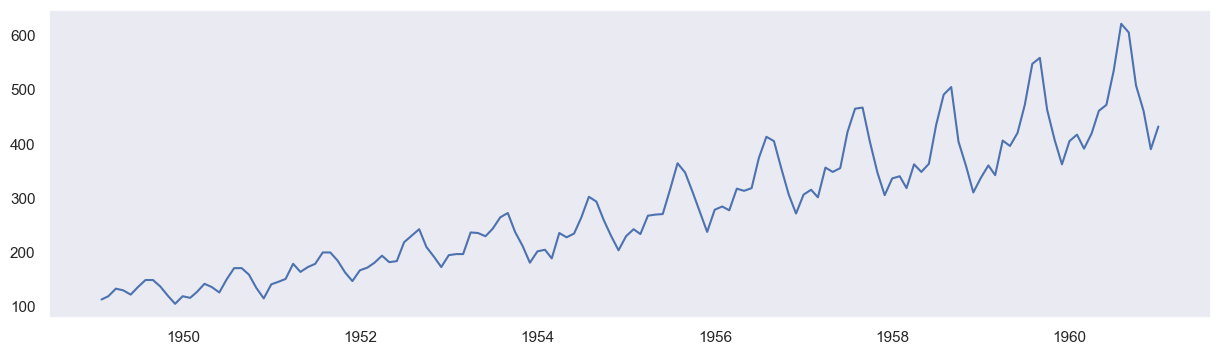

In [297]:
plt.plot(airp)

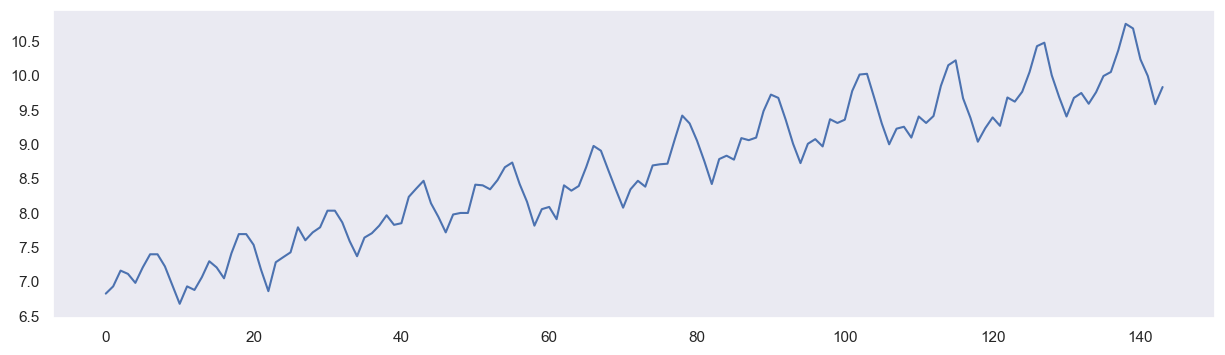

In [298]:
plt.plot(xt)

<AxesSubplot:xlabel='date'>

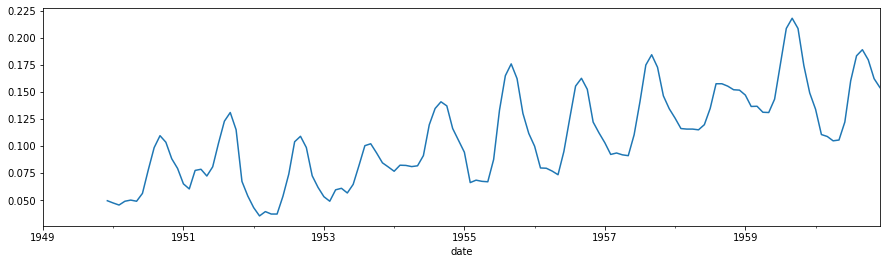

In [642]:
pd.Series(xt, index=airp.index).rolling(12).var().plot()


# 6. Testing for Autocorrelation

In [299]:
import pandas as pd
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.datasets import co2

co2_df = co2.load_pandas().data.ffill()

In [300]:
co2_diff = co2_df.diff().dropna()

In [301]:
acorr_ljungbox(co2_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,16.465996,4.953050e-05
2,79.094659,6.680563e-18
3,290.951900,9.035108e-63
4,390.520507,3.107289e-83
5,502.638658,2.151267e-106
6,546.194148,9.337537e-115
7,608.250032,4.072029e-127
8,630.709764,5.827742e-131
9,637.510409,1.851867e-131
10,641.806647,1.923859e-131


In [302]:
acorr_ljungbox(co2_diff, auto_lag=True, return_df=True)

,lb_stat,lb_pvalue
1,16.465996,4.953050e-05
2,79.094659,6.680563e-18
3,290.951900,9.035108e-63
4,390.520507,3.107289e-83
5,502.638658,2.151267e-106
...,...,...
2210,74510.868394,0.000000e+00
2211,74513.567714,0.000000e+00
2212,74515.294613,0.000000e+00
2213,74520.306956,0.000000e+00


# 7. Plotting ACF and PACF

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pathlib import Path
plt.rcParams["figure.figsize"] = (15,4)

In [186]:
file = Path('../../datasets/Ch8/air_passenger.csv')
airp = pd.read_csv(file, 
                   index_col='date', 
                   parse_dates=['date'])

In [173]:
airp_diff = airp.diff().dropna()

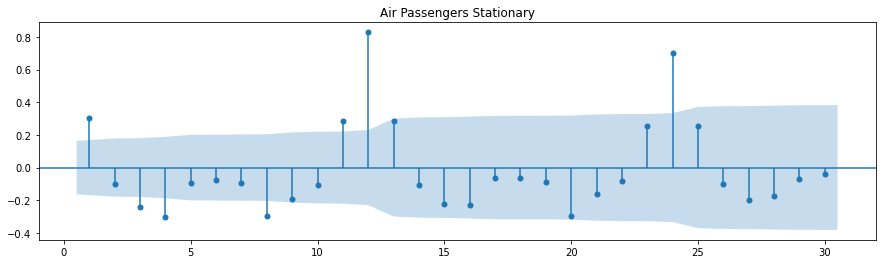

In [182]:
_ = plot_acf(airp_diff, lags=30, title='Air Passengers Stationary', zero=False)

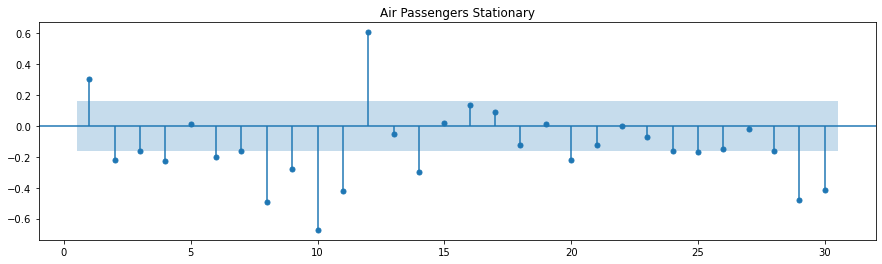

In [183]:
_ = plot_pacf(airp_diff, lags=30, title='Air Passengers Stationary', zero=False)

In [162]:
from pandas.plotting import autocorrelation_plot

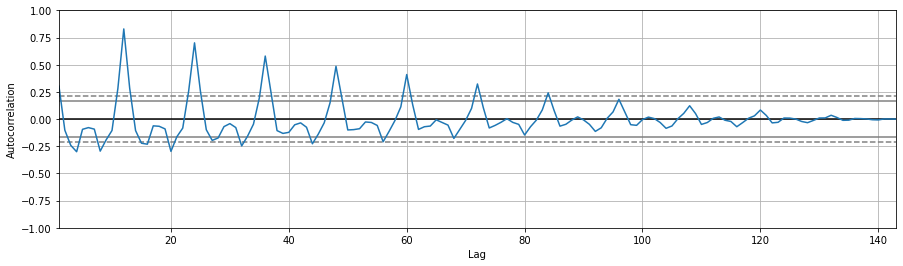

In [185]:
_ = autocorrelation_plot(airp_diff)